# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df=study_results.merge(mouse_metadata, on='Mouse ID',how='left')

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
combined_df.loc[ : ,'Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df=combined_df.value_counts(subset=['Mouse ID'])
df.head(10)


Mouse ID
g989        13
a203        10
n364        10
m546        10
m550        10
m601        10
m650        10
a251        10
m957        10
n304        10
Name: count, dtype: int64

In [4]:
#new df of the mouse with multiple mouse ids 
df=combined_df.loc[combined_df['Mouse ID']=='g989']
df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df=combined_df.loc[combined_df['Mouse ID']!='g989']

cleaned_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
#export cleaned df as a csv to data folder
cleaned_df.to_csv('data/cleaned.csv')

In [7]:
# Checking the number of mice in the clean DataFrame.
cleaned_df.loc[:,'Mouse ID'].nunique()

248

## Summary Statistics

In [8]:
mean=cleaned_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
mean.head()

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Name: Tumor Volume (mm3), dtype: float64

In [9]:
median=cleaned_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
median.head()

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Name: Tumor Volume (mm3), dtype: float64

In [10]:
variance=cleaned_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
variance.head()

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Name: Tumor Volume (mm3), dtype: float64

In [11]:
std=cleaned_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
std.head()

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Name: Tumor Volume (mm3), dtype: float64

In [12]:
sem=cleaned_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
sem.head()

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Name: Tumor Volume (mm3), dtype: float64

In [13]:
drug_summary_df=pd.DataFrame({'Mean Tumor Vol':mean,'Median Tumor Vol':median, 'Variance of Tumor Vol':variance, 
                              'Std. dev of Tumor Vol':std, 'Std. Error of Tumor Vol':sem})
drug_summary_df

,Mean Tumor Vol,Median Tumor Vol,Variance of Tumor Vol,Std. dev of Tumor Vol,Std. Error of Tumor Vol
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


### A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
### and SEM of the tumor volume for each regimen (only one method is required in the solution)

### Using the aggregation method, produce the same summary statistics in a single line


In [14]:
df_agg=cleaned_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
df_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#filter data
bar_df=cleaned_df.groupby(['Drug Regimen'])['Timepoint'].count()
bar_df.sort_values(ascending=False,inplace=True)

bar_df.head()


Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Name: Timepoint, dtype: int64

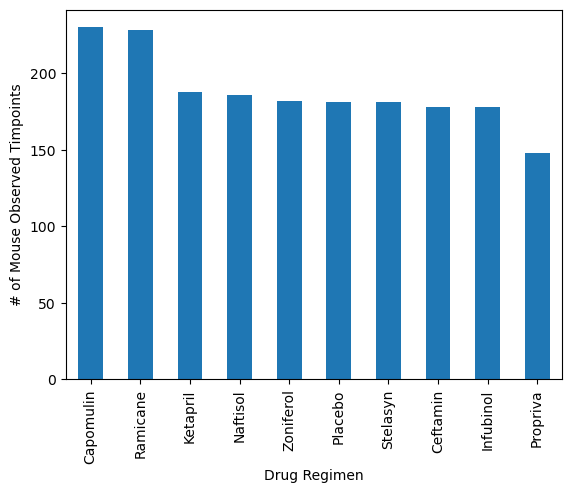

In [16]:
bar_df.plot(kind='bar',xlabel='Drug Regimen',ylabel='# of Mouse Observed Timpoints')
plt.show()

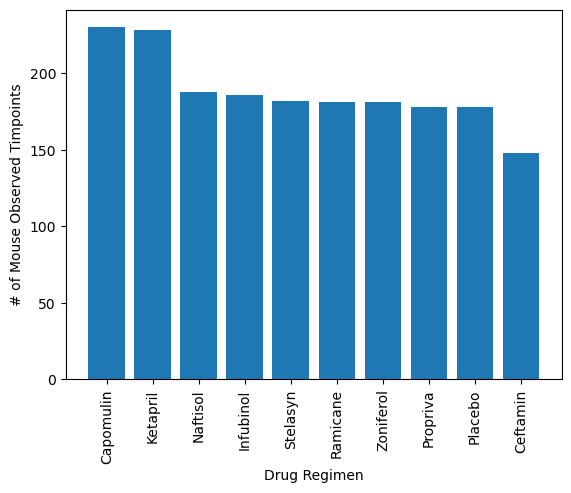

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis=cleaned_df['Drug Regimen'].unique()
height= bar_df
plt.bar(x_axis,height)

plt.xticks(rotation='vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Mouse Observed Timpoints')
plt.show()

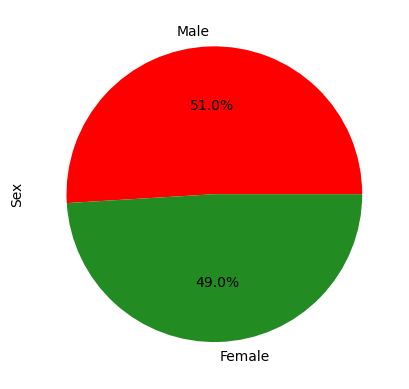

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_df=cleaned_df.loc[:,'Sex']
diff_sex_df=sex_df.value_counts()

#find number of males and females
diff_sex_df=sex_df.value_counts()
diff_sex_df
diff_sex_df.plot(kind='pie',ylabel='Sex', autopct='%1.1f%%',colors=('r','forestgreen'))
plt.show()

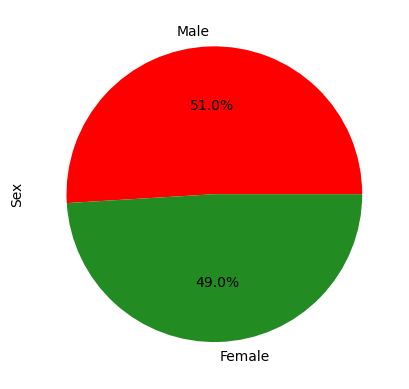

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(diff_sex_df,labels=['Male','Female'],autopct='%1.1f%%',colors=('r','forestgreen'))
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin



filter_df=cleaned_df.loc[(cleaned_df['Drug Regimen']== 'Capomulin') | (cleaned_df['Drug Regimen']== 'Ramicane')
             | (cleaned_df['Drug Regimen']== 'Infubinol') | (cleaned_df['Drug Regimen']== 'Ceftamin')]

# Start by getting the last (greatest) timepoint for each mouse
# filter_df=cleaned_df.loc[(cleaned_df['Timepoint']== max_timepoint)]
max_timepoints=filter_df.groupby('Mouse ID')['Timepoint'].max().reset_index()




# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_vol_df = pd.merge(max_timepoints, filter_df, on=['Mouse ID', 'Timepoint'], how='left')
final_tumor_vol_df




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [21]:
# Put treatments into a list for for loop (and later for plot labels)
list_treatment=['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list=[]
outliers={}

# for index,row in new_df.iterrows():
for drug_used in list_treatment:

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol=final_tumor_vol_df.loc[final_tumor_vol_df['Drug Regimen']==drug_used]['Tumor Volume (mm3)']
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    # Determine outliers using upper and lower bounds
    quartiles=final_tumor_vol.quantile([.25,.5,.75])
    lowerq=quartiles[.25]
    upperq=quartiles[.75]
    iqr=upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers[drug_used] = (final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)])
outliers
    
    
    
    


{'Capomulin': Series([], Name: Tumor Volume (mm3), dtype: float64),
 'Ramicane': Series([], Name: Tumor Volume (mm3), dtype: float64),
 'Infubinol': 15    36.321346
 Name: Tumor Volume (mm3), dtype: float64,
 'Ceftamin': Series([], Name: Tumor Volume (mm3), dtype: float64)}

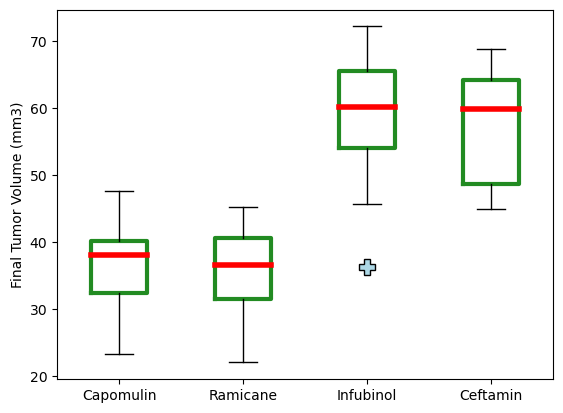

In [22]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#https://matplotlib.org/3.1.1/gallery/statistics/boxplot.html used this to help customize outliers and customize the box plots

flierprops=dict(marker='P', markerfacecolor='lightblue', markersize=12,
                  linestyle='none')
boxprops=dict(linewidth=3, color='ForestGreen')
medianprops=dict(color='Red',linewidth=4)
plt.boxplot(tumor_vol_list,labels=list_treatment,flierprops=flierprops,boxprops=boxprops,medianprops=medianprops)

plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

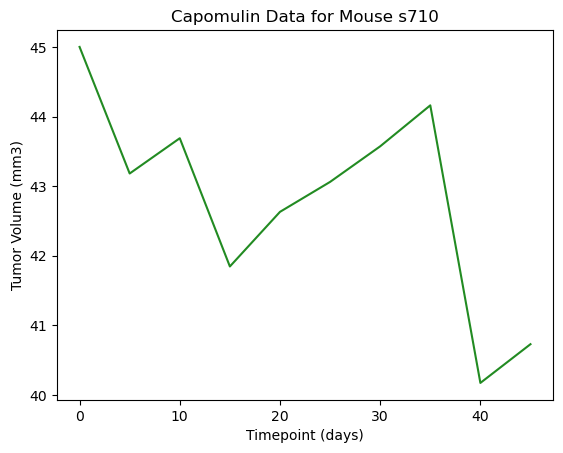

In [29]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap_df=cleaned_df.loc[(cleaned_df['Drug Regimen']== 'Capomulin')]
cap_mi_df=cap_df.loc[(cleaned_df['Mouse ID']=='s710')]
cap_mi_df.plot('Timepoint','Tumor Volume (mm3)',xlabel='Timepoint (days)',ylabel='Tumor Volume (mm3)',title='Capomulin Data for Mouse s710',legend=False, color='Forestgreen')
plt.show()

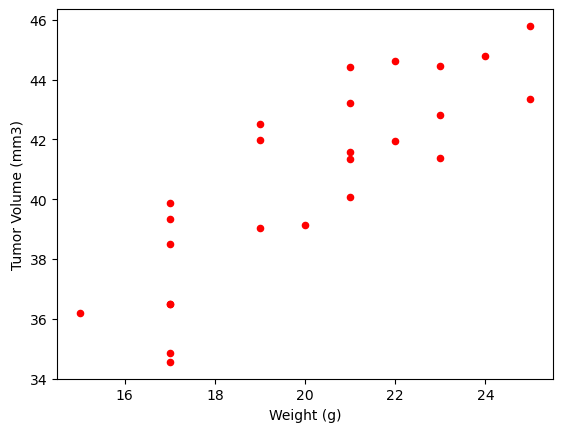

In [53]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

cap_mw_vol_df=pd.DataFrame(cap_df.groupby(['Mouse ID','Weight (g)'])['Tumor Volume (mm3)'].mean().reset_index())
x='Weight (g)'
y='Tumor Volume (mm3)'
cap_mw_vol_df.plot.scatter(x,y,color='r')
# cap_mw_vol_df.plot.scatter('Weight (g)','Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


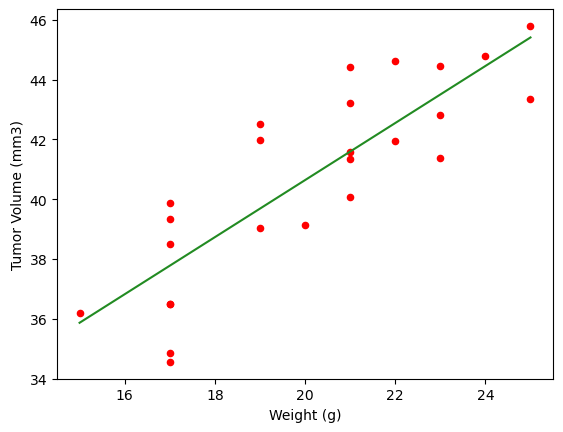

In [52]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
results_list=st.linregress(cap_mw_vol_df['Weight (g)'],cap_mw_vol_df['Tumor Volume (mm3)'])
results_list
slope=results[0]
intercept=results[1]
r_value=round(results[2],2)
x_1=[cap_mw_vol_df['Weight (g)'].min(),cap_mw_vol_df['Weight (g)'].max()]
y_pred=slope*np.array(x_1)+intercept

print(f'The correlation between mouse weight and the average tumor volume is {r_value}')

cap_mw_vol_df.plot.scatter(x,y,color='red')
plt.plot(x_1,y_pred,color='forestgreen')
plt.show()
